In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read csv files
#train = pd.read_csv('../training_set.csv',header=0)
#train_meta = pd.read_csv('../training_set_metadata.csv',header=0)
train = pd.read_csv('/modules/cs342/Assignment2/training_set.csv',header=0)
train_meta = pd.read_csv('/modules/cs342/Assignment2/training_set_metadata.csv',header=0)

### Plot graphs to explore data

There are 14 unique targets
[92 88 42 90 65 16 67 95 62 15 52  6 64 53]
   ddf  object_id
0    0       5732
1    1       2116
   ddf  object_id
0    0         51
1    1       2083
    object_id          ra       decl       gal_l      gal_b  ddf  \
0         615  349.046051 -61.943836  320.796530 -51.753706    1   
5        1227   35.683594  -5.379379  171.992947 -59.253501    1   
9        1926  149.414062   1.940072  236.565366  41.393323    1   
14       2624  346.655182 -63.260487  320.952196 -50.040935    1   
15       2677   53.964844 -28.630989  225.142950 -53.813613    1   

    hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod  mwebv  target  
0             0.0             0.0                 0.0      NaN  0.017      92  
5             0.0             0.0                 0.0      NaN  0.020      65  
9             0.0             0.0                 0.0      NaN  0.018      65  
14            0.0             0.0                 0.0      NaN  0.019      65  
15         

/Users/jayzern/cs342/assignmentone-jayzern/venv/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jayzern/cs342/assignmentone-jayzern/venv/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


   object_id         mjd  passband        flux   flux_err  detected  \
0        615  59750.4229         2 -544.810303   3.622952         1   
1        615  59750.4306         1 -816.434326   5.553370         1   
2        615  59750.4383         3 -471.385529   3.801213         1   
3        615  59750.4450         4 -388.984985  11.395031         1   
4        615  59752.4070         2 -681.858887   4.041204         1   

           ra       decl      gal_l      gal_b  ddf  hostgal_specz  \
0  349.046051 -61.943836  320.79653 -51.753706    1            0.0   
1  349.046051 -61.943836  320.79653 -51.753706    1            0.0   
2  349.046051 -61.943836  320.79653 -51.753706    1            0.0   
3  349.046051 -61.943836  320.79653 -51.753706    1            0.0   
4  349.046051 -61.943836  320.79653 -51.753706    1            0.0   

   hostgal_photoz  hostgal_photoz_err  distmod  mwebv target  extragalactic  
0             0.0                 0.0      NaN  0.017     92              

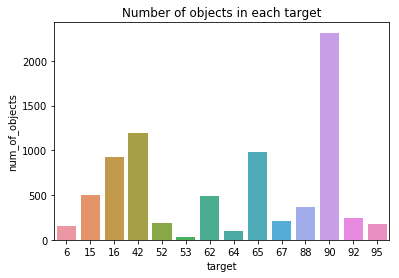

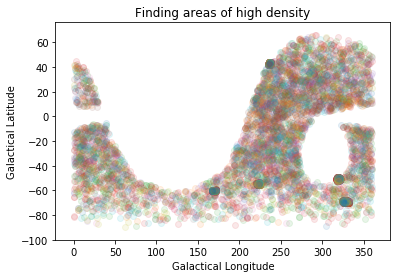

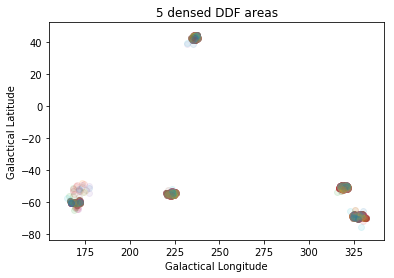

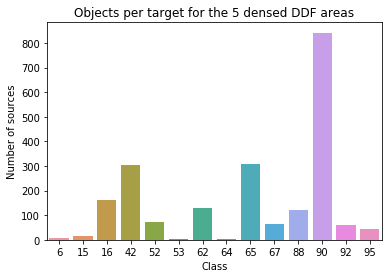

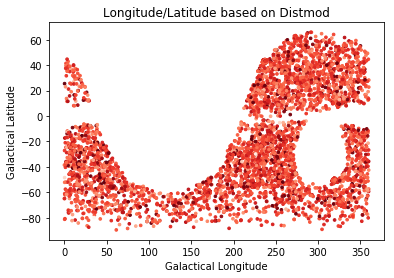

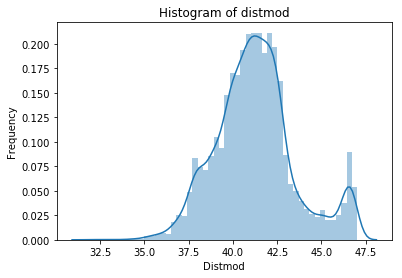

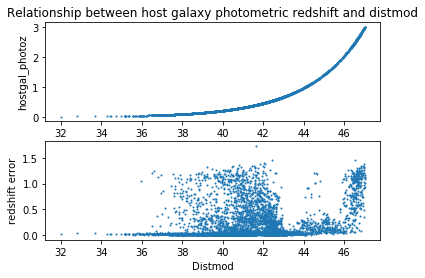

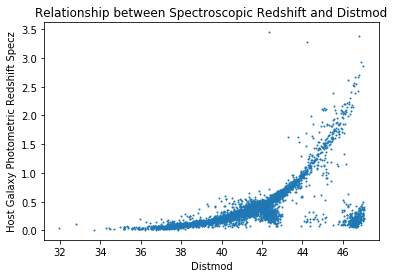

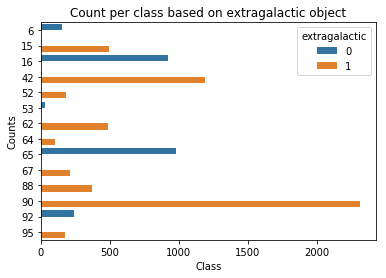

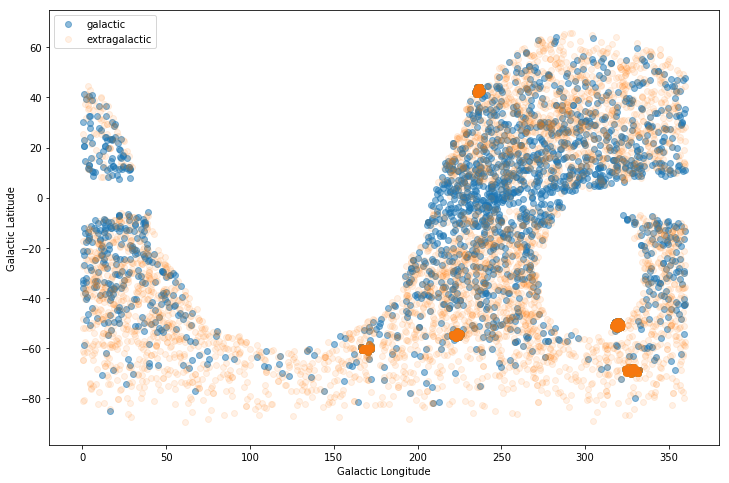

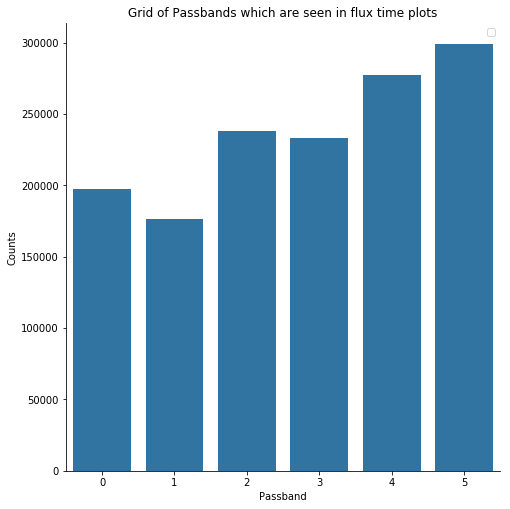

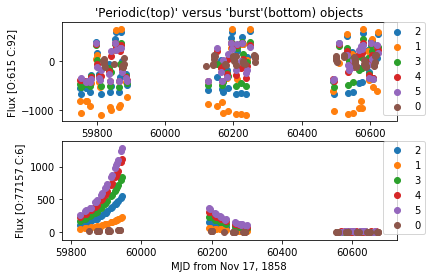

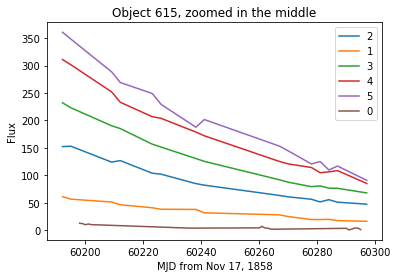

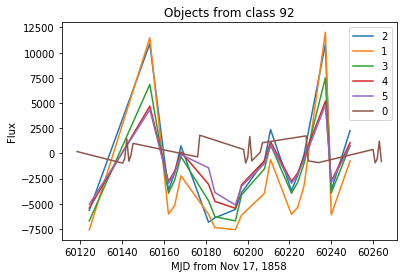

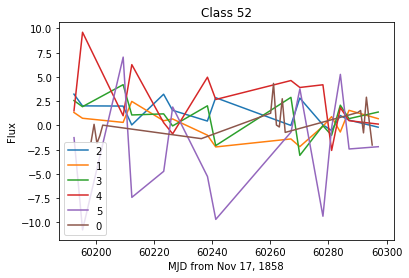

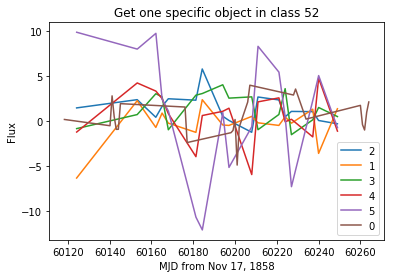

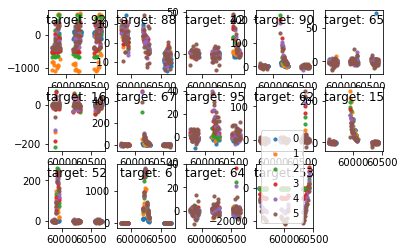

In [2]:
# Find how many targets are there
targets = train_meta.target.unique()
print("There are {} unique targets".format(len(targets)))
print(targets)

# Plot barchart for targets
plt.figure()
objects_per_target = pd.DataFrame(train_meta.groupby("target", as_index=False)["object_id"].count())
objects_per_target = objects_per_target.rename(columns = {"object_id": "num_of_objects"})
plt.title("Number of objects in each target")
sns.barplot(x=objects_per_target.target, y=objects_per_target.num_of_objects)

# Plot how classes are spread in space (latitude,longitude)
# There are 5 densed areas based on graph
fig = plt.figure()
ax = fig.add_subplot(111)
for class_target in targets:
    class_used = train_meta[train_meta['target'] == class_target]
    ax.scatter(x=class_used.gal_l, y=class_used.gal_b, alpha=0.1)
plt.title("Finding areas of high density")
plt.xlabel("Galactical Longitude")
plt.ylabel("Galactical Latitude")

# Explore 5 unusually densed areas
condition = (train_meta["gal_b"].between(38,48,inclusive=True) & train_meta["gal_l"].between(226,238,inclusive=True)) \
            |(train_meta["gal_b"].between(-56,-52,inclusive=True) & train_meta["gal_l"].between(220,226,inclusive=True)) \
            |(train_meta["gal_b"].between(-66,--56,inclusive=True) & train_meta["gal_l"].between(165,178,inclusive=True)) \
            |(train_meta["gal_b"].between(-55,-45,inclusive=True) & train_meta["gal_l"].between(315,323,inclusive=True)) \
            |(train_meta["gal_b"].between(-77,-65,inclusive=True) & train_meta["gal_l"].between(322,332,inclusive=True))

five_point = train_meta.loc[condition]
fig = plt.figure()
ax = fig.add_subplot(111)
for class_target in targets:
    class_used = five_point[five_point.target == class_target]
    ax.scatter(class_used.gal_l,class_used.gal_b, alpha = .1)
ax.set_title("5 densed DDF areas")
ax.set_xlabel("Galactical Longitude")
ax.set_ylabel("Galactical Latitude")

# Now plot for the 5 objects_per_target for 5 densed plots
objects_per_target_five = pd.DataFrame(five_point.groupby("target", as_index=False)["object_id"].count())
objects_per_target_five = objects_per_target_five.rename(columns = {"object_id": "num_of_objects"})
fig = plt.figure()
sns.barplot(x=objects_per_target_five['target'],y=objects_per_target_five['num_of_objects'])
plt.title("Objects per target for the 5 densed DDF areas")
plt.xlabel("Class")
plt.ylabel("Number of sources")

# Find DDF_counts
ddf_counts = pd.DataFrame(train_meta.groupby("ddf", as_index=False)["object_id"].count())
print ddf_counts
ddf_counts_five = pd.DataFrame(five_point.groupby("ddf", as_index=False)["object_id"].count())
print ddf_counts_five

# Check if distances vary with galaxy coordinates
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_meta['gal_l'], train_meta['gal_b'], c=train_meta['distmod'], s=7, cmap='Reds')
ax.set_title("Longitude/Latitude based on Distmod")
ax.set_xlabel("Galactical Longitude")
ax.set_ylabel("Galactical Latitude")

# Investigate Distmod and redshift
# Histogram for distmod
# Distance of source distances is kind of normal
fig = plt.figure()
sns.distplot(train_meta[~np.isnan(train_meta['distmod'])]['distmod'])
plt.title("Histogram of distmod")
plt.xlabel('Distmod')
plt.ylabel('Frequency')

# Redshift and distmod
# The further a source is, the more is the redshift
fig = plt.figure()
plt.subplot(211)
plt.scatter(train_meta['distmod'], train_meta['hostgal_photoz'], s=1)
plt.title("Relationship between host galaxy photometric redshift and distmod")
plt.ylabel('hostgal_photoz')

# Error of redshift versus Distmod
plt.subplot(212)
plt.scatter(train_meta['distmod'], train_meta['hostgal_photoz_err'], s=1)
plt.xlabel('Distmod')
plt.ylabel('redshift error')

# Redshift specz vs Distmod
fig = plt.figure()
plt.scatter(train_meta['distmod'], train_meta['hostgal_specz'], s=1)
plt.title("Relationship between Spectroscopic Redshift and Distmod")
plt.xlabel('Distmod')
plt.ylabel('Host Galaxy Photometric Redshift Specz')

# Split dataset between galactic and extragalactic source
# Note:
# 1) photoz is zero for both galactic sources
# 2) distmod is NaN to all of them
galactic = train_meta[train_meta['hostgal_photoz'] == 0]
extragalactic = train_meta[train_meta['hostgal_photoz'] != 0]
print galactic.head(5)
print extragalactic.head(5)

# Explore galactic and extragalactic
# 1 is extragalactic, 0 is galactic
# When we deal with galactic sources, we only deal with 5 classes
# In extragalactic sources, we only deal with 9 classes
plt.figure()
train_meta['extragalactic'] = 0
train_meta.loc[train_meta['hostgal_photoz'] != 0, 'extragalactic'] = 1
train_meta['target'] = train_meta['target'].astype('category', copy=False)
sns.countplot(y="target", hue='extragalactic', data=train_meta, linewidth=5)
plt.title("Count per class based on extragalactic object")
plt.xlabel("Class")
plt.ylabel("Counts")

# Plot map with extragalactic and galactical distinction
fig = plt.figure(figsize=(12,8))
plt.scatter(x=galactic['gal_l'], y=galactic['gal_b'], alpha=0.5, label='galactic')
plt.scatter(x=extragalactic['gal_l'], y=extragalactic['gal_b'], alpha=0.1, label='extragalactic')
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.legend()

# Explore passbands
# Merge train_meta and train
train_merged = train.merge(train_meta, on='object_id')
#print train_merged.head(10)

grid = sns.FacetGrid(data=train_merged, height=7)
grid.map(sns.countplot, 'passband')
for ax in grid.axes.ravel():
    ax.legend()
plt.title("Grid of Passbands which are seen in flux time plots")
plt.xlabel("Passband")
plt.ylabel("Counts")

# Choose one object to plot, in this case, object=615
unique_objects = train_merged['object_id'].unique()
object_data = train_merged[train_merged['object_id'] == 615]
print object_data.head(5)
# Observe how flux of each passband varies with time
# Not very helpful!
# Seems to be a timewindows
unique_passbands = train_merged['passband'].unique()
fig = plt.figure()
plt.subplot(211)
for passband in unique_passbands:
    specific_passband = object_data[object_data['passband'] == passband]
    plt.scatter(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.title("'Periodic(top)' versus 'burst'(bottom) objects")
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux [O:615 C:92]")
plt.legend(bbox_to_anchor=(1.1, 1.05))

unique_objects = train_merged['object_id'].unique()
object_data = train_merged[train_merged['object_id'] == 77157]
print object_data.head(5)
# Observe how flux of each passband varies with time
# Not very helpful!
# Seems to be a timewindows
unique_passbands = train_merged['passband'].unique()
plt.subplot(212)
for passband in unique_passbands:
    specific_passband = object_data[object_data['passband'] == passband]
    plt.scatter(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux [O:77157 C:6]")
plt.legend(bbox_to_anchor=(1.1, 1.05))

# Focus on one specific window
window_object = object_data[(object_data['mjd'] > 60100) & (object_data['mjd'] < 60300)]
fig = plt.figure()
for passband in unique_passbands:
    specific_passband = window_object[window_object['passband'] == passband]
    plt.plot(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.title("Object 615, zoomed in the middle")
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux")
plt.legend()

# Plot objects from class 92 to confirm that different sources of will show different flux behaviours
object_92 = train_merged[train_merged['target'] == 92]
unique_sources = object_92['object_id'].unique()
object_data= train_merged[train_merged['object_id'] == unique_sources[4]]
window_object = object_data[(object_data['mjd'] > 60100) & (object_data['mjd'] < 60300)]
fig = plt.figure()
for passband in unique_passbands:
    specific_passband = window_object[window_object['passband'] == passband]
    plt.plot(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.title("Objects from class 92")
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux")
plt.legend()

# Plot objects from class 52
objects_52 = train_merged[train_merged['target'] == 52]
unique_sources = objects_52['object_id'].unique()
object_data= train_merged[train_merged['object_id'] == unique_sources[0]]
window_object = object_data[(object_data['mjd'] > 60100) & (object_data['mjd'] < 60300)]
fig = plt.figure()
for passband in unique_passbands:
    specific_passband = window_object[window_object['passband'] == passband]
    plt.plot(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.title("Class 52")
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux")
plt.legend()

# Plot one specific object in class 52
object_data = train_merged[train_merged['object_id'] == unique_sources[2]]
window_object = object_data[(object_data['mjd'] > 60100) & (object_data['mjd'] < 60300)]
fig = plt.figure()
for passband in unique_passbands:
    specific_passband = window_object[window_object['passband'] == passband]
    plt.plot(specific_passband['mjd'], specific_passband['flux'], label=passband)
plt.title("Get one specific object in class 52")
plt.xlabel("MJD from Nov 17, 1858")
plt.ylabel("Flux")
plt.legend()

# Note: Seems like galactic objects have a more regular structure
# extragalactic objects more irregular?

""" Jay: Show how each target looks like"""
unique_passbands = [0,1,2,3,4,5]
unique_targets = [92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52, 6, 64, 53]
# Get 10 different objects per target
plt.figure()
count = 1
for target in unique_targets:
    # Get first object of each target
    objects = train_meta[train_meta['target'] == target].head(1)['object_id']
    for object in objects:
        # Get Time Series data of that object
        window_object = train[(train['object_id']==object)]
        plt.subplot(3,5,count)
        count += 1
        for passband in unique_passbands:
            specific_passband = window_object[window_object['passband'] == passband]
            plt.scatter(specific_passband['mjd'], specific_passband['flux'], label=passband, alpha=0.9, s=10)
        plt.title("target: " + str(target), position=(0.5, 0.7))
plt.legend()

plt.show()